In [7]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

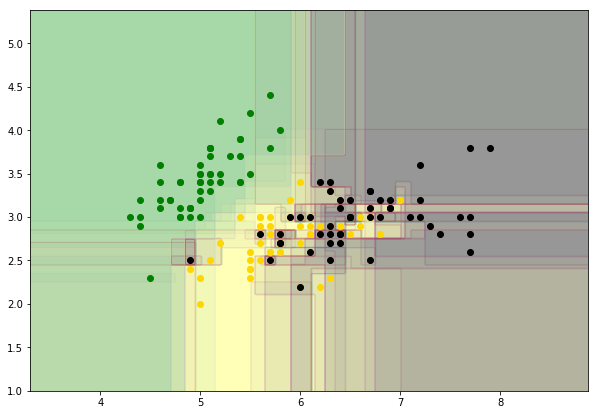

In [20]:
plt.figure(figsize=(10,7))

n_estimators = 10
plot_colors = ['g', 'gold', 'black']
cmap = 'Accent'
plot_step = 0.02  # fine step width for decision surface contours
pair= [0,1]
n_classes = 3

# Load data
iris = load_iris()

plot_idx = 1

clf = RandomForestClassifier(n_estimators=n_estimators)
# We only take the two corresponding features
X = iris.data[:, pair]
y = iris.target

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(42)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Train
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=cmap)

## Ничего лишнего:

In [21]:
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


#######
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=43)
DT.fit(X_train, y_train)
print('DT:', DT.score(X_test, y_test))

#######
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42,
                            n_estimators=100)
RF.fit(X_train, y_train)
print('RF:', RF.score(X_test, y_test))

#######
RF = RandomForestClassifier(random_state=42, n_estimators=100, 
                            oob_score=True)
RF.fit(X_train, y_train)
print('RF oob:', RF.oob_score_)

DT: 0.9111111111111111
RF: 0.8888888888888888
RF oob: 0.9523809523809523


Сравнение с другими алгоритмами:
<a href="http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png" alt="Нажми меня!"> <img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png"></a>


## Выводы:
- Random Forest борется с изъянами Decision Tree путем построения большого количества разных деревьев и их коллективного голосования.
- Random Forest – не интерпретируемый алгоритм
- Качество Random Forest неубывает с увеличением деревьев (не происходит переобучения)
- Функция predict_proba() для Random Forest имеет больший смысл, чем для Decision Tree